# Fundamental of Data Analytics Project
# Using Naive Bayes Model, to Predict Victim Descent from Los Angeles Crime Data 2020-2023
## GROUP MEMBERS :
### - Gilbert Gule (300364183)
### - Arifin Wirawan (300355689)
### - Awais Sadaqat (300359008)
### - Komal Kamboj (300357751)



## Introduction

### Description of Data:  The dataset reflects incidents of crime in the City of Los Angeles dating back from 2020 to 2023.  As per the source, the dataset serves as a valuable resource for law enforcement agencies, researchers, policymakers, and the general public interested in understanding and addressing crime in one of the largest cities in the United States .  It contains 28 columns describing details of each crime recorded such as the nature of the crime, where it occurred, the weapon used and the victim's attributes (e.g. age, sex, descent).  (Refer to the succeeding codes determining the specific columns in the dataset).  The dataset was obtained from kaggle, posted October 2023:  https://www.kaggle.com/datasets/anoopjohny/los-angeles-crime-data-from-2020-to-present.

### Objective of the Project:  With the dataset, the team would want to explore and come up with a machine learning model to predict based on the description of a particular crime whether the target VICTIM will be of a "Black" descent or "Others".  If successful and if the model can yield good accuracy result, this can be used by government agencies to provide security measures to communities with residents that can be primarily identified based on a specific descent.  For example, if crimes in a particular area has common characteristics in terms of location, age of victim, weapon used, etc, the model should be able to tell that the target victim of these common crimes are of which descent such as either "Black" or "Others".  With this, law enforcement agencies can put in place security measures to areas that has dominant residents that match with what the model indicates.

# A. Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
import numpy as np
%matplotlib inline

#import classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

#import selector
from sklearn.feature_selection import SelectFromModel

#import scorer
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import mean_squared_error

In [2]:
# Step 1: Read the raw dataset
# Data Reference : https://www.kaggle.com/datasets/sumaiaparveenshupti/los-angeles-crime-data-20102020
df = pd.read_csv('crime.csv')

In [3]:
# Step 2: Check the summary statistics of the dataset using describe()
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.029560e+05,802956.000000,802956.000000,802956.000000,802956.000000,802956.000000,802956.000000,802947.000000,279525.000000,802946.000000,59147.000000,1970.000000,57.000000,802956.000000,802956.000000
mean,2.158016e+08,1335.403294,10.715737,1117.999182,1.414290,500.743798,29.847791,305.763698,362.840966,500.481701,957.431045,983.892893,990.368421,33.977505,-118.020515
std,1.071699e+07,654.164612,6.092093,609.194026,0.492599,207.829477,21.762934,216.577524,123.726239,207.618224,111.585024,50.704245,28.594225,1.809752,6.275190
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.101176e+08,900.000000,6.000000,622.000000,1.000000,331.000000,9.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.013600,-118.429600
50%,2.201057e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321500
75%,2.218191e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [4]:
# Step 3: Print dataset info to get an idea of the features and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           802956 non-null  int64  
 1   Date Rptd       802956 non-null  object 
 2   DATE OCC        802956 non-null  object 
 3   TIME OCC        802956 non-null  int64  
 4   AREA            802956 non-null  int64  
 5   AREA NAME       802956 non-null  object 
 6   Rpt Dist No     802956 non-null  int64  
 7   Part 1-2        802956 non-null  int64  
 8   Crm Cd          802956 non-null  int64  
 9   Crm Cd Desc     802956 non-null  object 
 10  Mocodes         692304 non-null  object 
 11  Vict Age        802956 non-null  int64  
 12  Vict Sex        697683 non-null  object 
 13  Vict Descent    697675 non-null  object 
 14  Premis Cd       802947 non-null  float64
 15  Premis Desc     802481 non-null  object 
 16  Weapon Used Cd  279525 non-null  float64
 17  Weapon Des

In [5]:
# Step 4: Move the target feature to the beginning of the dataset and display the head
cols = list(df.columns.values)
cols.pop(cols.index('Vict Descent'))
df = df[['Vict Descent'] + cols]
df.head()

,Vict Descent,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,B,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,H,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,X,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,W,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,X,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
# Step 5: Rename the columns to make them all lowercase and replace white spaces with underscores 
# so every columns will have the same format
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vict_descent    697675 non-null  object 
 1   dr_no           802956 non-null  int64  
 2   date_rptd       802956 non-null  object 
 3   date_occ        802956 non-null  object 
 4   time_occ        802956 non-null  int64  
 5   area            802956 non-null  int64  
 6   area_name       802956 non-null  object 
 7   rpt_dist_no     802956 non-null  int64  
 8   part_1-2        802956 non-null  int64  
 9   crm_cd          802956 non-null  int64  
 10  crm_cd_desc     802956 non-null  object 
 11  mocodes         692304 non-null  object 
 12  vict_age        802956 non-null  int64  
 13  vict_sex        697683 non-null  object 
 14  premis_cd       802947 non-null  float64
 15  premis_desc     802481 non-null  object 
 16  weapon_used_cd  279525 non-null  float64
 17  weapon_des

In [7]:
# Step 6: Get the dimensions of the dataframe(rows and columns)
df.shape

(802956, 28)

In [8]:
# Step 7: Show the values and counts of the classes in the target column of the dataset
# Vict Descent: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian 
# H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other 
#P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian.
print(df['vict_descent'].value_counts())

H    246453
W    164007
B    114645
X     76912
O     63709
A     17563
K      4281
F      3344
C      3064
J      1113
V       828
I       762
Z       407
P       214
U       166
D        58
G        54
L        49
S        44
-         2
Name: vict_descent, dtype: int64


In [9]:
# Step 8: Check the number of classes in the target feature and handle class imbalance
class_counts = df['vict_descent'].value_counts()
threshold = 100  
other_classes = class_counts[class_counts < threshold].index
df['vict_descent'] = df['vict_descent'].apply(lambda x: x if x not in other_classes else 'Other')
new_class_counts = df['vict_descent'].value_counts()
print(new_class_counts)

H        246453
W        164007
B        114645
X         76912
O         63709
A         17563
K          4281
F          3344
C          3064
J          1113
V           828
I           762
Z           407
P           214
Other       207
U           166
Name: vict_descent, dtype: int64


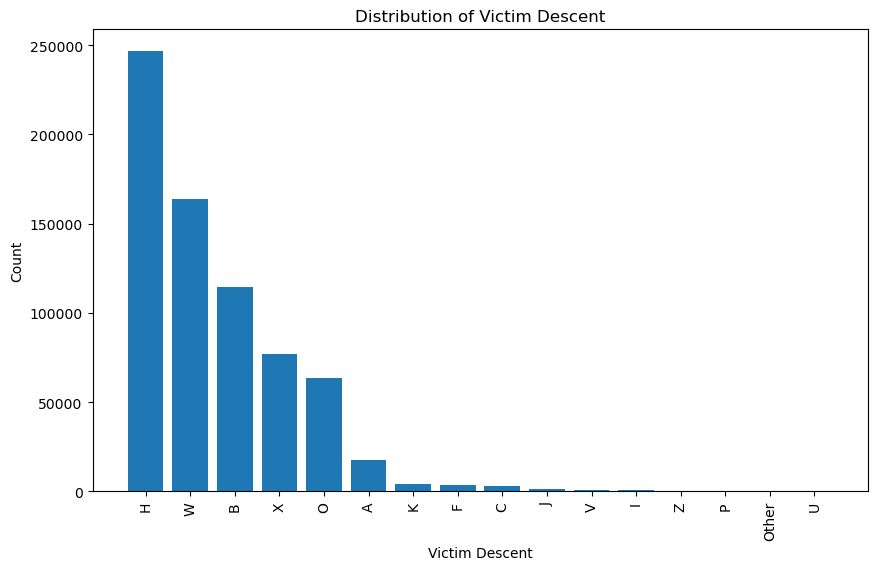

In [10]:
# Step 9: Visualize the dataset using Matplotlib

# Calculate the class counts
class_counts = df['vict_descent'].value_counts()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.title('Distribution of Victim Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [11]:
# Step 10 : Changing the value of the time_occ column
print("Raw format of the hours: ", df['time_occ'].unique())
# Convert 'time_occ' to a string to use .str accessor
df['time_occ'] = df['time_occ'].astype(str)

# Handle the 'time_occ' column
# Extract the first 2 characters (hours) from the 'time_occ' column and convert them to integers
# Handle non-integer values
df['time_occ'] = df['time_occ'].str[:2]
df['time_occ'] = pd.to_numeric(df['time_occ'], errors='coerce')

df['time_occ'] = df['time_occ'].fillna(-1)

# Convert to integer
df['time_occ'] = df['time_occ'].astype(int)

# Ensure that 'time_occ' contains valid hour values (0 to 23)
df['time_occ'] = df['time_occ'].astype(int) % 24

# Now, 'time_occ' should contain only 24 unique hour values
format_hours = df['time_occ'].unique()
print("New Format of the hours:", format_hours)

Raw format of the hours:  [2230  330 1200 ...  559  818  841]
New Format of the hours: [22  9 12 17  6 13 16 20 19 23 18  1 14 10 15 21  7 11  0  8  2  4  3  5]


In [12]:
# Step 11 : Re-check the dataset after dropping irrelevant features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vict_descent    697675 non-null  object 
 1   dr_no           802956 non-null  int64  
 2   date_rptd       802956 non-null  object 
 3   date_occ        802956 non-null  object 
 4   time_occ        802956 non-null  int32  
 5   area            802956 non-null  int64  
 6   area_name       802956 non-null  object 
 7   rpt_dist_no     802956 non-null  int64  
 8   part_1-2        802956 non-null  int64  
 9   crm_cd          802956 non-null  int64  
 10  crm_cd_desc     802956 non-null  object 
 11  mocodes         692304 non-null  object 
 12  vict_age        802956 non-null  int64  
 13  vict_sex        697683 non-null  object 
 14  premis_cd       802947 non-null  float64
 15  premis_desc     802481 non-null  object 
 16  weapon_used_cd  279525 non-null  float64
 17  weapon_des

In [13]:
# Step 12 : Examine each feature (unique values, null values, and handling)
for feature in df.columns:
    # Print the number of unique values
    unique_values = df[feature].nunique()
    print(f'Feature: {feature}, Unique Values: {unique_values}')

    # Print the number of null values
    null_values = df[feature].isnull().sum()
    print(f'Feature: {feature}, Null Values: {null_values}')


Feature: vict_descent, Unique Values: 16
Feature: vict_descent, Null Values: 105281
Feature: dr_no, Unique Values: 802956
Feature: dr_no, Null Values: 0
Feature: date_rptd, Unique Values: 1357
Feature: date_rptd, Null Values: 0
Feature: date_occ, Unique Values: 1357
Feature: date_occ, Null Values: 0
Feature: time_occ, Unique Values: 24
Feature: time_occ, Null Values: 0
Feature: area, Unique Values: 21
Feature: area, Null Values: 0
Feature: area_name, Unique Values: 21
Feature: area_name, Null Values: 0
Feature: rpt_dist_no, Unique Values: 1204
Feature: rpt_dist_no, Null Values: 0
Feature: part_1-2, Unique Values: 2
Feature: part_1-2, Null Values: 0
Feature: crm_cd, Unique Values: 138
Feature: crm_cd, Null Values: 0
Feature: crm_cd_desc, Unique Values: 138
Feature: crm_cd_desc, Null Values: 0
Feature: mocodes, Unique Values: 268499
Feature: mocodes, Null Values: 110652
Feature: vict_age, Unique Values: 103
Feature: vict_age, Null Values: 0
Feature: vict_sex, Unique Values: 5
Feature: vi

In [14]:
# We drop some irrelevant features to our predicting modelling, and we leave the features that we deemed relevant and significant
# to our modelling
# AREA: The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
# Crm Cd: Indicates the crime committed.
# Vict Age : Two character numeric.
# Premis Cd: The type of structure, vehicle, or location where the crime took place.
# Weapon Used Cd: The type of weapon used in the crime.

features = ['vict_descent', 'time_occ', 'area','crm_cd', 'vict_age', 'premis_cd', 'weapon_used_cd']
df = df[features]  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vict_descent    697675 non-null  object 
 1   time_occ        802956 non-null  int32  
 2   area            802956 non-null  int64  
 3   crm_cd          802956 non-null  int64  
 4   vict_age        802956 non-null  int64  
 5   premis_cd       802947 non-null  float64
 6   weapon_used_cd  279525 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 39.8+ MB


In [15]:
# Loop through each column in the DataFrame
for feature in df.columns:
    # Print the number of unique values in each feature
    unique_values = df[feature].nunique()
    print(f'Feature: {feature}, Unique Values: {unique_values}') 

Feature: vict_descent, Unique Values: 16
Feature: time_occ, Unique Values: 24
Feature: area, Unique Values: 21
Feature: crm_cd, Unique Values: 138
Feature: vict_age, Unique Values: 103
Feature: premis_cd, Unique Values: 313
Feature: weapon_used_cd, Unique Values: 79


In [16]:
# dropping rows that contain any missing values. 
df = df.dropna()

# check and print the count of missing values in each column of the DataFrame 
# after the rows with missing values have been dropped.
df.isnull().sum()

vict_descent      0
time_occ          0
area              0
crm_cd            0
vict_age          0
premis_cd         0
weapon_used_cd    0
dtype: int64

In [17]:
top_n = 14
top_values = df['weapon_used_cd'].value_counts().index[:top_n]
df['weapon_used_cd'] = df['weapon_used_cd'].apply(lambda x: x if x in top_values else 0 )
# df = df[df['weapon_used_cd'].isin(top_values)]

#top_values = df['vict_descent'].value_counts().index[:top_n]
#df['vict_descent'] = df['vict_descent'].apply(lambda x: x if x in top_values else 'Other' )

top_values = df['premis_cd'].value_counts().index[:top_n]
df['premis_cd'] = df['premis_cd'].apply(lambda x: x if x in top_values else 0 )

top_values = df['crm_cd'].value_counts().index[:top_n]
df['crm_cd'] = df['crm_cd'].apply(lambda x: x if x in top_values else 0 )

# Define the age bins
age_bins = [0, 20, 30, 40, 50, float("inf")]  # Define your desired age ranges here

# Define numeric labels for the bins (1, 2, 3, 4, 5)
age_labels = [1, 2, 3, 4, 5]

# Create a new column 'age_group' with numeric values based on the age bins
df['age_group'] = pd.cut(df['vict_age'], bins=age_bins, labels=age_labels, include_lowest=True, right=False)
df['age_group'] = df['age_group'].astype(float)
df.drop(columns=['vict_age'], inplace=True)
df = df[df['age_group'] >= 0]

# Define the time bins
time_bins = [0, 6, 12, 18, float("inf")]  # Define your time ranges here

# Define numeric labels for the bins (0,1, 2, 3, 4, 5, 6)
time_labels = [1, 2, 3, 4]

# Create a new column 'age_group' with numeric values based on the age bins
df['time_group'] = pd.cut(df['time_occ'], bins=time_bins, labels=time_labels, include_lowest=True, right=False)
df['time_group'] = df['time_group'].astype(float)
df.drop(columns=['time_occ'], inplace=True)

df['vict_descent'] = df['vict_descent'].apply(lambda x: x if x == 'B' else 'Other' )

# sex_mapping = {'M': 1, 'F': 2, 'X': 3, 'H': 4}

# df['vict_sex'] = df['vict_sex'].map(sex_mapping)

for feature in df.columns:
    unique_values = df[feature].nunique()
    print(f'Feature: {feature}, Unique Values: {unique_values}')

print(df.info())

Feature: vict_descent, Unique Values: 2
Feature: area, Unique Values: 21
Feature: crm_cd, Unique Values: 15
Feature: premis_cd, Unique Values: 15
Feature: weapon_used_cd, Unique Values: 15
Feature: age_group, Unique Values: 5
Feature: time_group, Unique Values: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 279373 entries, 0 to 802953
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vict_descent    279373 non-null  object 
 1   area            279373 non-null  int64  
 2   crm_cd          279373 non-null  int64  
 3   premis_cd       279373 non-null  float64
 4   weapon_used_cd  279373 non-null  float64
 5   age_group       279373 non-null  float64
 6   time_group      279373 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.1+ MB
None


In [18]:
for feature in df.columns:
    # Print the number of unique values
    unique_values = df[feature].nunique()
    print(f'Feature: {feature}, Unique Values: {unique_values}')

Feature: vict_descent, Unique Values: 2
Feature: area, Unique Values: 21
Feature: crm_cd, Unique Values: 15
Feature: premis_cd, Unique Values: 15
Feature: weapon_used_cd, Unique Values: 15
Feature: age_group, Unique Values: 5
Feature: time_group, Unique Values: 4


In [19]:
print(df['vict_descent'].value_counts())

Other    219015
B         60358
Name: vict_descent, dtype: int64


In [20]:
# Area Description :
# 0 : Others
# 1 : Central
# 12 : 77th Street
# 6 : Hollywood
# 18 : Southeast
# 3 : Southwest
# 13 : Newton
#  2 : Rampart
# 20 : Olympic
# 14 : Pacific
# 5 : Harbor
# 15 : N Hollywood
# 4 : Hollenbeck
# 19 : Mission
# 10 : West Valley
# 7 : Wishere
# 9 : Van Nuys
# 11 : Northeast
# 21 : Topanga
# 16 : Foothill
# 17 : Devonshire
# 8 : West LA

print(df['area'].value_counts())

12    24817
1     21509
18    19633
3     17214
6     16998
13    16736
2     15765
20    14812
14    12735
5     11522
15    10879
4     10873
19    10547
10    10368
7     10321
9      9490
11     9406
21     9223
16     8946
17     8906
8      8673
Name: area, dtype: int64


In [21]:
# Crime description :
# 0 : Others
# 624 : BATTERY - SIMPLE ASSAULT
# 626 : INTIMATE PARTNER - SIMPLE ASSAULT
# 210 : ROBBERY
# 230 : ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
# 930 : CRIMINAL THREATS - NO WEAPON DISPLAYED
# 761 : BRANDISH WEAPON
# 236 : INTIMATE PARTNER - AGGRAVATED ASSAULT
# 310 : BURGLARY
# 740 : VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)
# 220 : ATTEMPTED ROBBERY
# 625 : OTHER ASSAULT
# 860 : BATTERY WITH SEXUAL CONTACT
# 121 : RAPE, FORCIBLE
# 627 : CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
print(df['crm_cd'].value_counts())

624    63822
230    46132
626    40376
0      32738
210    27494
930    16546
761    12456
236    10951
310     6151
740     5116
220     4170
625     3707
860     3545
121     3181
627     2988
Name: crm_cd, dtype: int64


In [22]:
# Premis Description : 
# 0 : Others
# 501 : Single family Dwelling
# 101 : Street
# 502 : Multi-unit Dwelling (Apartment, Duplex, Etc)
# 102 : Sidewalk
# 108 : Parking Lot
# 203 : Other Business
# 210 : Restaurant/ Fast food
# 122 : Vehicle, Passenger/ Truck
# 103 : Alley
# 109 : Park/ Playground
# 104 : Driveway
# 301 : Gas Station
# 503 : Hotel
# 402 : Market
print(df['premis_cd'].value_counts())

101.0    59318
501.0    51335
502.0    47041
0.0      44050
102.0    27541
108.0    15608
203.0    11025
210.0     3962
122.0     3657
103.0     3196
109.0     2824
104.0     2787
301.0     2425
503.0     2390
402.0     2214
Name: premis_cd, dtype: int64


In [23]:
# Weapon Used Description :
# 400 : STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
# 500 : UNKNOWN WEAPON/OTHER WEAPON
# 0.0 : Others
# 511 : VERBAL THREAT
# 102 : HAND GUN
# 109 : SEMI-AUTOMATIC PISTOL
# 200 : KNIFE WITH BLADE 6INCHES OR LESS
# 106 : UNKNOWN FIREARM
# 207 : OTHER KNIFE
# 512 : MACE/PEPPER SPRAY
# 307 : VEHICLE
# 306 : ROCK/THROWN OBJECT
# 312 : PIPE/METAL PIPE
# 212 : BOTTLE
# 308 : STICK
print(df['weapon_used_cd'].value_counts())

400.0    149843
500.0     29470
0.0       24799
511.0     20492
102.0     17293
109.0      6300
200.0      5901
106.0      5652
207.0      5047
512.0      3156
307.0      2821
306.0      2381
312.0      2141
212.0      2111
308.0      1966
Name: weapon_used_cd, dtype: int64


In [24]:
# Range of age group
# 1: 0 to 20 
# 2: 20 to 30 
# 3: 30 to 40 
# 4: 40 to 50
# 5: 50 and above
print(df['age_group'].value_counts())

2.0    66538
3.0    64565
5.0    58419
1.0    46203
4.0    43648
Name: age_group, dtype: int64


In [25]:
# 1: 00:00 AM to 6 AM 
# 2: 6 AM to 12 PM
# 3: 12 PM to 6 PM
# 4: 6 PM and above
print(df['time_group'].value_counts())

4.0    114649
3.0    103483
2.0     47062
1.0     14179
Name: time_group, dtype: int64


In [26]:
top_n = 3
top_values = df['vict_descent'].value_counts().index[:top_n]

# Create a mapping dictionary based on the top values
mapping_dict = {value: index + 1 for index, value in enumerate(top_values)}

# Use the mapping dictionary to replace the values in the 'vict_descent' feature
df['vict_descent'] = df['vict_descent'].map(mapping_dict)
print(df['vict_descent'].value_counts())


1    219015
2     60358
Name: vict_descent, dtype: int64


In [27]:
#save the cleaned/modified dataset
df.to_csv('modified_datafile.csv', index=False)
print("Cleaned CSV file saved successfully.")

Cleaned CSV file saved successfully.


In [28]:
df.corr()

,vict_descent,area,crm_cd,premis_cd,weapon_used_cd,age_group,time_group
vict_descent,1.000000,-0.035866,0.019857,0.054628,-0.039210,0.067455,-0.014958
area,-0.035866,1.000000,-0.002295,0.059846,-0.020897,-0.009592,0.012070
crm_cd,0.019857,-0.002295,1.000000,0.155562,0.293639,0.144528,-0.006206
premis_cd,0.054628,0.059846,0.155562,1.000000,0.130106,0.051723,0.008385
weapon_used_cd,-0.039210,-0.020897,0.293639,0.130106,1.000000,0.057043,-0.024305
age_group,0.067455,-0.009592,0.144528,0.051723,0.057043,1.000000,-0.010875
time_group,-0.014958,0.012070,-0.006206,0.008385,-0.024305,-0.010875,1.000000


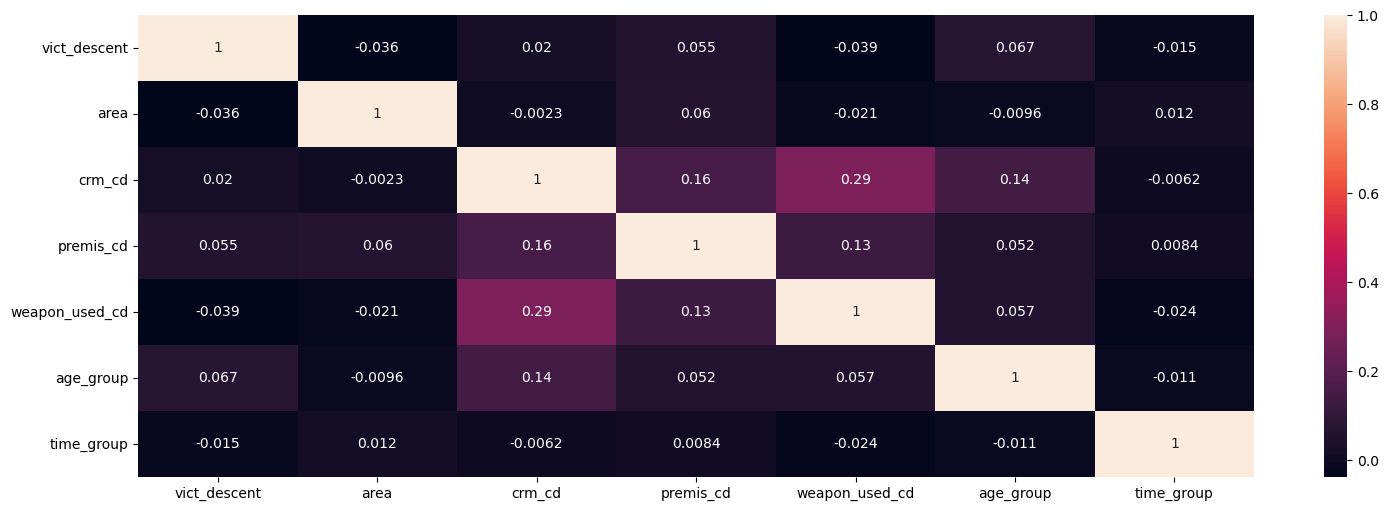

In [29]:
# Plot the heatmap of the correlation.
import seaborn as sns

plt.figure(figsize=(18, 6)) 
sns.heatmap(data=df.corr(), annot=True)
plt.show()

### As can be seen in the correlation heatmap, the selected predictors do not show correlation among themselves having no values that are closer to 1 or -1. 

In [30]:
df.head(30)

,vict_descent,area,crm_cd,premis_cd,weapon_used_cd,age_group,time_group
0,2,3,624,501.0,400.0,3.0,4.0
1,1,1,624,102.0,500.0,2.0,2.0
5,1,1,121,0.0,500.0,2.0,2.0
10,1,1,0,101.0,306.0,2.0,4.0
11,1,1,930,108.0,511.0,3.0,4.0
13,1,1,0,0.0,500.0,1.0,3.0
15,1,19,626,501.0,400.0,2.0,1.0
16,1,11,626,501.0,400.0,3.0,4.0
17,1,5,0,102.0,400.0,2.0,4.0
19,2,1,210,103.0,0.0,5.0,3.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279373 entries, 0 to 802953
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   vict_descent    279373 non-null  int64  
 1   area            279373 non-null  int64  
 2   crm_cd          279373 non-null  int64  
 3   premis_cd       279373 non-null  float64
 4   weapon_used_cd  279373 non-null  float64
 5   age_group       279373 non-null  float64
 6   time_group      279373 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 17.1 MB


In [32]:
df.describe()

,vict_descent,area,crm_cd,premis_cd,weapon_used_cd,age_group,time_group
count,279373.000000,279373.000000,279373.000000,279373.000000,279373.000000,279373.000000,279373.000000
mean,1.216048,10.513017,440.878818,240.125585,341.299252,3.005520,3.140418
std,0.411548,6.220775,274.448486,204.364196,155.173792,1.375622,0.873002
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,5.000000,230.000000,101.000000,307.000000,2.000000,3.000000
50%,1.000000,11.000000,624.000000,108.000000,400.000000,3.000000,3.000000
75%,1.000000,16.000000,626.000000,501.000000,400.000000,4.000000,4.000000
max,2.000000,21.000000,930.000000,503.000000,512.000000,5.000000,4.000000


## B. Model Planning, Implementation and Results Implementation

In [33]:
row_count = len(df)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 279373


In [34]:
X = df.drop(['vict_descent'], axis=1)  # Features
y = df['vict_descent']
print(X)

        area  crm_cd  premis_cd  weapon_used_cd  age_group  time_group
0          3     624      501.0           400.0        3.0         4.0
1          1     624      102.0           500.0        2.0         2.0
5          1     121        0.0           500.0        2.0         2.0
10         1       0      101.0           306.0        2.0         4.0
11         1     930      108.0           511.0        3.0         4.0
...      ...     ...        ...             ...        ...         ...
802939     4     236        0.0           400.0        4.0         4.0
802940    15     761      101.0           200.0        3.0         2.0
802943     6     210      101.0           400.0        2.0         3.0
802952    16     230      102.0           400.0        2.0         2.0
802953    12     230        0.0           500.0        2.0         3.0

[279373 rows x 6 columns]


In [35]:
#Splitting the training and testing datasets

from sklearn.model_selection import train_test_split

#test_size: This is the proportion of the dataset that should be held out for testing. In this case, it's set to 0.2, 
#which means 20% of the data will be used for testing, and the remaining 80% will be used for training.
#random_state value: this will get the same split every time the code is run. This is important for reproducibility 
#and debugging. The actual value (42 in this case) doesn't have a special meaning; could use any integer.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Printing a sample of the training features
print("\nTraining features:")
print("Shape:", X_train.shape)
print("\nSample:")
print(X_train.head())

# Printing a sample of the training target
print("\nTraining target:")
print("Shape:", y_train.shape)
print("\nSample:")
print(y_train.head())

# Printing a sample of the testing features
print("\nTesting features:")
print("Shape:", X_test.shape)
print("\nSample:")
print(X_test.head())

# Printing a sample of the testing target
print("\nTesting target:")
print("Shape:", y_test.shape)
print("\nSample:")
print(y_test.head())


Training features:
Shape: (223498, 6)

Sample:
        area  crm_cd  premis_cd  weapon_used_cd  age_group  time_group
792967     1       0        0.0           400.0        4.0         3.0
130051    18     236      501.0           400.0        4.0         3.0
238513     7     626      502.0           400.0        2.0         3.0
206062     6     210      203.0           511.0        1.0         3.0
427288    15     624      502.0           500.0        5.0         3.0

Training target:
Shape: (223498,)

Sample:
792967    1
130051    1
238513    1
206062    1
427288    1
Name: vict_descent, dtype: int64

Testing features:
Shape: (55875, 6)

Sample:
        area  crm_cd  premis_cd  weapon_used_cd  age_group  time_group
531270     1     624        0.0           400.0        5.0         4.0
406625    19     624      108.0           400.0        2.0         4.0
533653    16     626      502.0           400.0        4.0         4.0
358321     7     930      203.0           511.0        3.0 

Accuracy: 0.7909082774049218
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.96      0.88     43834
           2       0.54      0.19      0.28     12041

    accuracy                           0.79     55875
   macro avg       0.68      0.57      0.58     55875
weighted avg       0.75      0.79      0.75     55875



<Axes: xlabel='Predicted', ylabel='Actual'>

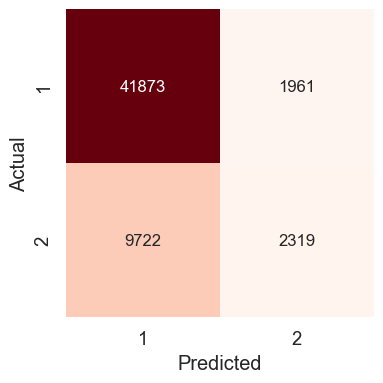

In [37]:
#Categorical Naive Bayes

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Naive Bayes is a probabilistic algorithm that uses Bayes' Theorem to make predictions based on the presence 
#or absence of features in a given dataset. It assumes that the features in the dataset are independent of each other, 
#which is why it is called "naive."


# Since NB approach computes the probability for every feature to predict a particular category, there could be an instance
# that the probability for a feature is 0.  To get the overall probability to predict a category, it would mean multiplying
# the probabilities of all the features.  And having 0 as one of the multipliers would result to a 0 product therefore ignoring
# all other values.  Alpha addresses this which is an additional count assigned to every feature hence resulting to not having 
# a situation where the probability of a feature is 0.

# Create a new Categorical Naive Bayes model with the best hyperparameters
best_model_NB = CategoricalNB(alpha=2.0, fit_prior=True)

# Train the model on your training data
best_model_NB.fit(X_train, y_train)

# Make predictions using the trained model
y_predbest = best_model_NB.predict(X_test)
y_testbest = y_test
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_testbest, y_predbest)
report = classification_report(y_testbest, y_predbest)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


data = confusion_matrix(y_testbest, y_predbest)
df_cm = pd.DataFrame(data, columns=np.unique(y_testbest), index = np.unique(y_testbest))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          square=True, fmt="d", cmap="Reds")# font size

Accuracy: 0.7777897091722595
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.92      0.87     43834
           2       0.47      0.26      0.33     12041

    accuracy                           0.78     55875
   macro avg       0.65      0.59      0.60     55875
weighted avg       0.74      0.78      0.75     55875



<Axes: xlabel='Predicted', ylabel='Actual'>

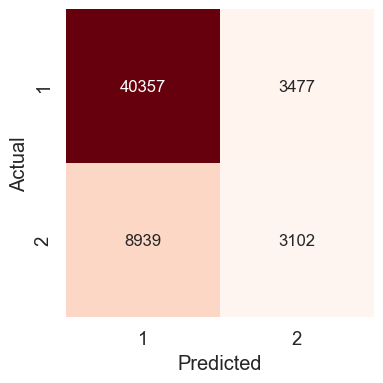

In [38]:
#Random Forest 

#n_estimators=200: This parameter specifies the number of decision trees that will be created in the random forest. 
#In this case, the value is set to 200. Having a larger number of trees can lead to a more robust and stable model, 
#but it may also increase computation time.
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          square=True, fmt="d", cmap="Reds")# font size

Accuracy: 0.7686979865771812
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.92      0.87     43834
           2       0.47      0.26      0.33     12041

    accuracy                           0.78     55875
   macro avg       0.65      0.59      0.60     55875
weighted avg       0.74      0.78      0.75     55875



<Axes: xlabel='Predicted', ylabel='Actual'>

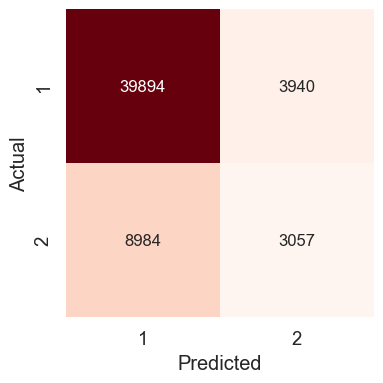

In [39]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and split your data into X_train, X_test, y_train, y_test

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          square=True, fmt="d", cmap="Reds")# font size

Accuracy: 0.7845011185682327
Classification Report:
               precision    recall  f1-score   support

           1       0.78      1.00      0.88     43834
           2       0.00      0.00      0.00     12041

    accuracy                           0.78     55875
   macro avg       0.39      0.50      0.44     55875
weighted avg       0.62      0.78      0.69     55875



C:\Users\arifi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arifi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arifi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='Predicted', ylabel='Actual'>

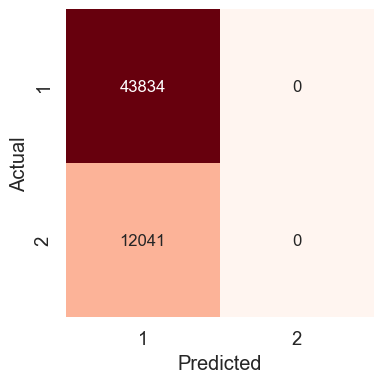

In [40]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Logistic regression is similar to linear regression except, logistic regression predicts whether something is True or False 
#instead of predicting something continuous like price houses.
#Instead of fitting a line to the data, logistic regression fits an "S" shaped logistic function.  The curve goes from 0 to 1 
#and tells you the probability of something based on the x feature

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_testbest), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          square=True, fmt="d", cmap="Reds")# font size

In [41]:
X_test.describe()

,area,crm_cd,premis_cd,weapon_used_cd,age_group,time_group
count,55875.000000,55875.000000,55875.000000,55875.000000,55875.000000,55875.000000
mean,10.536501,441.411418,241.192895,341.187078,3.005727,3.140546
std,6.225742,273.730283,204.532914,154.920903,1.374436,0.877194
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,230.000000,101.000000,307.000000,2.000000,3.000000
50%,11.000000,624.000000,108.000000,400.000000,3.000000,3.000000
75%,16.000000,626.000000,501.000000,400.000000,4.000000,4.000000
max,21.000000,930.000000,503.000000,512.000000,5.000000,4.000000


###  Model Selection:  We compared 4 models to run the dataset and identify which gives the best results.  The models include Categorical Naive Bayes, Random Forest Classifier, Decision Tree Classifier and Logistic Regression.  After generating the classification report and accuracy matrix for each model, we were able to identify that Categorical Naive Bayes yielded 79% accuracy followed by Logistic Regression (78%), Random Forest Classifier (77.8%) and Decision Tree Classifier (76.9%).  Looking at the Confusion Matrix, the Categorical Naive Bayes model indicates 81% and 54% precision for (1) "Other" and (2) "Black", respectively, which means that the model was able to accurately predict (1:41873 , 2: 2319) cases out of the total predictions (1: 51595, 2: 4280).  In terms of recall, the model indicates 96% and 19% for (1) and (2), respectively.  This means that the model was able to accurately predict (1:41873 , 2: 2319) cases out of the total actual numbers (1: 43834, 2: 12041).   We picked Categorical Naive Bayes as the best model yielding the best accuracy scores.

# C. Out of Sample Predictions

In [42]:
sample_df = pd.read_csv('sample.csv')


#define function to display class label
def display_classLabel(y_pred_):
    label =''
    if y_pred_ ==1:
        label ='Others'
    else:
        label = 'Black'
    print('Predicted class membership for sample crime data is',y_pred_,', which means victim is ',label)
    

#creating for-loop to iterate over the rows of samples to get their classification 
# the results are displayed
for s in range (0,10):
    X_sample = pd.DataFrame([sample_df.iloc[s,:].values], columns=sample_df.columns)
    y_pred_sample = best_model_NB.predict(X_sample)
    #display predicted class label
    display_classLabel(y_pred_sample)

Predicted class membership for sample crime data is [1] , which means victim is  Others
Predicted class membership for sample crime data is [2] , which means victim is  Black
Predicted class membership for sample crime data is [1] , which means victim is  Others
Predicted class membership for sample crime data is [1] , which means victim is  Others
Predicted class membership for sample crime data is [2] , which means victim is  Black
Predicted class membership for sample crime data is [2] , which means victim is  Black
Predicted class membership for sample crime data is [2] , which means victim is  Black
Predicted class membership for sample crime data is [2] , which means victim is  Black
Predicted class membership for sample crime data is [1] , which means victim is  Others
Predicted class membership for sample crime data is [1] , which means victim is  Others


### Results:  We further tested the model using new data (out-of-sample) and check whether it can provide results.  Based on the results, out of the 10 new samples, it was able to identify 5 of which as Black and the rest were Others.  While we are only 79% confident with the model results, this can still be improved by performing some approaches such as continuous monitoring of the model's performance in a real-world environment, collecting additional data on an ongoing basis to improve the diversity and representativeness of the dataset, collecting information on misclassifications and using it to improve the training data, etc.